In [6]:
import re
import json
from bs4 import BeautifulSoup
from requests import request, HTTPError
from requests.compat import urljoin, urlparse, quote, unquote
from requests.sessions import Session
from time import sleep

In [3]:
def download(url, params={}, headers={}, method='GET', maximum=2):
    resp = request(url=url, params=params if method=='GET' else {},
            data=params if method=='POST' else {},
            headers=headers, method=method)
    
    
    try:
        resp.raise_for_status()
    except HTTPError as e:
        if 500 <= e.response.status_code < 600 and maximum > 0:
            print('retry')
            sleep(1) # 1초?
            resp = download(url, params, headers, method, maximum-1) # inf loop
        else:
            print(e)
        
    return resp

In [4]:
def can_fetch(url, path):
    resp = download(urljoin(url, '/robots.txt'))
    allow = list()
    disallow = list()
    
    
    if resp.status_code == 200:
        useragent = '*'
        for _ in resp.text.splitlines():
            pair = _.split(':')
            if len(pair) == 2:
                if pair[0].strip() == 'User-agent':
                    useragent = pair[1]
                else:
                    if pair[1].strip() == 'Allow':
                        allow.append(pair[1].strip())
                    else:
                        disallow.append(pair[1].strip())
      
    return True if path in allow else False, allow, disallow

In [5]:
# 큐로 push, pop 구현할 거
def new_download(url):
    _ = urlparse(url)
    print(can_fetch(_[0]+'://'+_[1], _[2])[0])
    
    return download(url, headers=headers)

In [8]:
naver = [
    {
        'name':'nid_enctp',
        'value':'1',
        'domain':'.nid.naver.com',
        'path':'/'
    },
    {
        'name':'nid_buk',
        'value':'NR3NUUON65EWA',
        'domain':'.nid.naver.com',
        'path':'/'
    },
    {
        'name':'NID_SES',
        'value':'AAABk4aThFRLEsUxW+90gC0CUPQBbH6/IZTIoZm+YdtjpakLWDf2j1AgISufgiRB5IAbuvgd3MJBmEJEQNYAslC7/m8xIqSp3D7Q/7sB3dvQfimZJLPqaTbymW/vRlOnt2N4P63lKNDPcpNla/UqOTputfaczFeuw9nUEcyXhT/RCdzjDrUfh7lmECD/8Z34W9NvHMh/fmNRbVc8t+O7hR9DwPDeRX3i8oklXBANaAdkq0Wqc8E0YNbtufSrUkxX1RtrGPp53uH44hEMRhdv//dzJPbLsjq0uVejxEg8FyfqLb2Fwx8uHQ3+DI4RYepHPpAKE7Sm5nhEpnW4ijgl/Uut2P6/pMDpqIgAj2TiHiMIMmGAs9jNLiSDAevr/k6rctiw+jl7cxACwJUafS+iYvfPI4KRbuNqdwgIy3eGDeKYiv8I8EBHpKPb/RjdM2yKVqWzt7vqvflj4pQtTRFTCk0dC/4pZpilP6GFrtpHICCspYXSDGKk8SeI9j3i6Sv7+VHC/hy0KpxYc04hkdq/BEngisglpmiC0G7VYZ1XbJO/SpMj',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'NID_JKL',
        'value':'9S2/pCZG2nfj17ANEJ+tsWgscTxIwOQeqZthDBD8Wz8=',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'NID_AUT',
        'value':'rLWcvaoZbz3ywku0Be20O3rKiKZLWppqyIRnxD0teFHenKnCEYUXYkS067Bv+8Dk',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'nid_inf',
        'value':'438370032',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'page_uid',
        'value':'hMi+YsprvmsssfOyKVlssssssI0-035896',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'nid_slevel',
        'value':'-1',
        'domain':'.nid.naver.com',
        'path':'/'
    },
    {
        'name':'NM_THEME_EDIT',
        'value':'',
        'domain':'www.naver.com',
        'path':'/'
    },
    {
        'name':'NFS',
        'value':'2',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'_ga_4BKHBFKFK0',
        'value':'GS1.1.1621083126.1.1.1621083136.50',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'NV_WETR_LAST_ACCESS_RGN_M',
        'value':'"MDkyOTAxMjU="',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'_fbp',
        'value':'fb.1.1621083129276.910894030=',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'_ga',
        'value':'GA1.2.884953782.1621083127',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'MM_NEW',
        'value':'1',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'nx_ssl',
        'value':'2',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'NM_THEME_LAST_FIXED',
        'value':'LIVING',
        'domain':'www.naver.com',
        'path':'/'
    },
    {
        'name':'NNB',
        'value':'NR3NUUON65EWA',
        'domain':'.naver.com',
        'path':'/'
    },
    {
        'name':'PM_CK_loc',
        'value':'5b3cfba8eee6debe05f5d6bd00f0cae55283961615268c1cf9cf2c843f5c4d5e',
        'domain':'www.naver.com',
        'path':'/'
    },
    {
        'name':'NV_WETR_LOCATION_RGN_M',
        'value':'"MDkyOTAxMjU="',
        'domain':'.naver.com',
        'path':'/'
    },
]

In [10]:
session = Session()
session.cookies.clear()

for i, _ in enumerate(naver):
    session.cookies.set(naver[i]['name'], naver[i]['value'],
                       domain=naver[i]['domain'], path=naver[i]['path'])

'\n\n\n<!DOCTYPE HTML>\n\n\t\n\t\n\t\n\t\n\t\n\t\t<html lang="ko">\n\t\n\n\n<head>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\t\n\t\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail2_le.min.210702.css">\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_skin.min.210702.css">\n\t\t\t\t\n\t\t\t\t\n\t\t\t\n\t\t\n\t\n\t\n\t\t\n\t\t\n\t\t\t\t<link rel="dns-prefetch" href="//ssl.pstatic.net" />\n\t\t\t\t<link rel="dns-prefetch" href="//lcs.naver.com" />\n\t\t\t\t<link rel="dns-prefetch" href="//cc.naver.com" />\n\t\t\t\t<link rel="dns-prefetch" href="//static.nid.naver.com" />\n\t\t\t\t<link rel="dns-prefetch" href="//phinf.pstatic.net" />\n\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_me.min.210702.css">\n\t\t\n\t\n\t<link rel="shortcut icon" href="/favicon.ico?2">\n\t\n\t\n\t\t\n\t\n\t<title>네이버 메일</title>\n\t<script type="text/jav
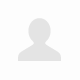
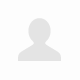

In [11]:
# 메일 화면이 뜨면서 로그인 된 것을 확인할 수 있음
resp = session.get('https://mail.naver.com')
resp.text

In [13]:
# 어제까지 한 내용 : 쿠키의 중요성
# 쿠키로 로그인을 어떻게 하는가! 왜 이게 중요한 것인가
# 오전에 할 내용 ) 스팸 메일

In [ ]:
# 요새 웹들은 리엑트와 같은 프레임워크를 사용하므로
# 실제 메일 데이터는 뒤에서 따로 가져오게 됨.

In [17]:
url = 'https://mail.naver.com/json/list/'

params = {
    'page':1,
    'sortField':1,
    'sortType':0,
    'folderSN':5,
    'type':None,
    'isUnread':'false',
    'u':'dimoteo333'
}

In [18]:
resp = request('get', url=url, params=params)

In [19]:
# 세션(쿠키값)없이 보내면 로그인이 필요하다고 나옴
resp.text

'{"Result":"FAIL","Message":"", "LoginStatus":"NOLOGIN"}'

In [23]:
resp = session.request('post', url=url, params=params)

In [30]:
resp.json().keys()

dict_keys(['currentTime', 'lastPage', 'Message', 'pageSize', 'unreadCount', 'mailData', 'folderName', 'totalCount', 'listCount', 'Result'])

In [31]:
resp.json()['mailData'][0].keys()

dict_keys(['mailSN', 'folderSN', 'folderName', 'iconType', 'status', 'from', 'subject', 'receivedTime', 'sentTime', 'size', 'attachCount', 'iDomainEmail', 'priority', 'securityLevel', 'reSend', 'color', 'preview', 'mimeSN', 'toList', 'spamType', 'attachInfo', 'threadId', 'bccList', 'receiveByBcc', 'threadCount', 'unreadThreadCount', 'firstLocatedTime', 'remindAt', 'threadRemindAt', 'threadRemindFlag', 'category', 'lastLocatedTime', 'toMe', 'bigFile', 'statusHex', 'isDomainMail', 'oldBigFile'])

In [40]:
for _ in resp.json()['mailData']:
    print(_['subject'])

(광고)★아에르 KF80 신상컬러 런칭/ ★스타벅스 콜드브루 메이커, 최저가+무배/ ★한정수량! 리유저블 텀블러 증정!
(광고) 긴급대출이 필요할때~ 믿을수 있는 &#39;맞춤형안심대출&#39;로 고민해결 OK!!
(광고) 라미 신상 아이온 다크그린 19% 할인 + 무료각인 / 탁상용 선풍기 최대 25% 할인 / 미니 건조기 최대 37% 할인
(광고) 가벼운 기분전환과 일상탈출! 예스24 단독 피크닉 와인잔 SET 출시 
(광고) 달콤 아삭 개별포장 세척사과 2kg(5~14과) 8,900원
(광고)★14인치 선풍기 29,000원/★클렌즈 스무디 7,900원/★외장하드 2TB 87,310원!
(광고) 떡볶이 외길! 줄 서서 먹는 두끼 떡볶이 집에서 즐겨요~
(광고) 내가 왜 황후인데? 로맨스 e캐시!
(광고) EVERGLOW ONLINE CONCERT ［THE FIRST］
(광고)▶마감임박! 간단한 설문하고 1천원 받으세요! (~7/9) 
 (광고) 이사카 고타로 &lt;시소 몬스터&gt; 피크닉 의자.작가 친필 인쇄 엽서 세트
(광고) 최고의 쇼핑비결! 슈퍼서울위크/랜선 전국투어! 집콕 쇼핑
(광고) [톡톡편지] 우리는 이 거대함의 일부였다
(광고) 생활대출이 꼭!! 필요할때, 믿을수 있는 &#39;맞춤형안심대출&#39;로 고민해결 OK!!
(광고) 쿠폰으로 더 저렴하게! 중고샵 할인 혜택 모음!


In [ ]:
# 의문점 : POST 방식으로 데이터를 보냈는데 주소 방식은 GET 방식임.
# 그렇지만 GET 방식으로 request를 보내면 서버가 응답을 끊음
# 소켓을 쓰는 경우가 아니라면 왠만해서는 다 가져올 수 있음.

In [50]:
from selenium.webdriver import Chrome, ChromeOptions # PhantomJS or ChormeOptions의 headless

In [49]:
# 코드에 의해 돌아가는 별개의 브라우져임.
# 원래 목적은 브라우져 테스트 용인데, 어쩌다 보니 수집용으로 쓰이고 있는거
# 원래는 requests 패키지를 사용해 수집하는 것이 맞는 것
driver = Chrome()

In [52]:
driver.get('https://www.naver.com') # 네이버로 이동함

In [54]:
# 이미 렌더링된 오브젝트 모델 (DOM)을 가지고 있음.
for _ in driver.find_elements_by_css_selector('button'): # 로그인 버튼을 찾아보자
    print(_.text)
    
# 없음.. 버튼이 아닌 듯?

3일 동안 보지 않기
검색
재생
새로운 글 더보기



라이트 모드로 보기


In [69]:
driver.find_element_by_css_selector('a.link_login').click()
# 로그인 화면으로 넘어감!

In [62]:
# HTML 코드 레벨에서 찾는 방법 - 이게 훨씬 빠름.
dom = BeautifulSoup(driver.page_source, 'lxml')

In [66]:
for _ in  dom.find_all(text=re.compile(r'로그인')):
    print(_.find_parent())
    
# 맨 마지막 값 : 로그인 버튼 바로가기

<span>로그인 바로가기</span>
<a class="btn btn_login" data-clk="sug.cxlogin" href="https://nid.naver.com/nidlogin.login">로그인</a>
<p class="desc">싸이월드 재오픈이 ‘또’ 미뤄졌다. 지난 3월 서비스 재개를 예고했으나, 7월 현재까지 3번이나 연기됐다. 거의 월례행사라는 조롱과 함께 서비스 재개가 과연 가능한 것이냐는 우려 섞인 목소리도 나온다.싸이월드 운영권을 가진 싸이월드제트는 7월 5일 오후 6시부터 개시하기로 했던 싸이월드 자동 로그인 서비스를 오는 8월 2일 오후 6시로</p>
<h2 class="blind">로그인</h2>
<a class="link_login" data-clk="log_off.login" href="https://nid.naver.com/nidlogin.login?mode=form&amp;url=https%3A%2F%2Fwww.naver.com"><i class="ico_naver"><span class="blind">네이버</span></i>로그인</a>


In [73]:
# 정확히는 form 태그를 꼭 먼저 찾아야함! 거기에 input parameter가 어떻게 들어가는지 확인해야 하므로
#
# 이를 활용하면 예매 매크로를 짤 수 있음.
for _ in driver.find_elements_by_css_selector('form > input[name]'):
    print(_.tag_name, _.get_attribute('name'))

input localechange
input dynamicKey
input encpw
input enctp
input svctype
input smart_LEVEL
input bvsd
input encnm
input locale
input url


In [76]:
driver.find_element_by_name('id').clear()
driver.find_element_by_name('id').send_keys('dimoteo333')

In [81]:
for _ in driver.find_elements_by_css_selector('form a, form button'):
    print(_.tag_name, _.text, _.get_attribute('id'))

button  id_clear
button  pw_clear
a  ipguide


In [82]:
form
 input -> param
 submit
 button
 a

이런 구조...

IndentationError: unexpected indent (<ipython-input-82-4f1ad00983f0>, line 2)

In [88]:
driver.find_element_by_name('pw').clear()
driver.find_element_by_name('pw').send_keys('abcde')

In [89]:
driver.find_element_by_css_selector(
    'form input[type=submit]').get_attribute('value')
driver.find_element_by_css_selector(
    'form input[type=submit]').click()

In [ ]:
# 백날 로그인 상태 유지 눌러도 안된다
# 백날 자주 사용하는 기기 등록해도 소용 없음.
# 실제 로그인을 시도해도, 마우스의 움직임이 없기 때문에 자동방지 입력문자를 입력해야만 함.
# 이를 해결하기 위해서는 계정의 보안 등급을 굉장히 낮춰야 로그인됨
# 예) 구글의 reCaptcha
#
# 기본적으로 자동입력 방지 문자로 글자를 살짝 기울인 정도는 뚫는 패키지가 존재

In [91]:
# 지금 보고 있는 창의 ID임. 새 탭을 띄우든, 드라이버를 다시 키든 매번 바뀔 예정
# => 등록해도 소용이 없음.
driver.current_window_handle

'CDwindow-FC05F84FB8F5EDC9E2586E32552B5494'

In [95]:
# 쿠키를 더 간단하게 이용하기
naver = driver.get_cookies()

In [96]:
session.cookies.get_dict()

{'MM_NEW': '1',
 'NFS': '2',
 'NID_AUT': 'rLWcvaoZbz3ywku0Be20O3rKiKZLWppqyIRnxD0teFHenKnCEYUXYkS067Bv+8Dk',
 'NID_JKL': '9S2/pCZG2nfj17ANEJ+tsWgscTxIwOQeqZthDBD8Wz8=',
 'NID_SES': 'AAABlJTAnZR0RxoIaeUW39KjLneMQgNbQMRvUqV24J+tyYsSYtbcKH7e8aZILFEDjPz8uvEfmjwIcfU296aHFQ6nBsUC0OV5Wj95t5n68udUc8MF1ppe6mvmN0P7Dg5WVjPE0lHpo6Sv+98Djgf1y4U7g/nQy4rmFf0iOpk69JuEFlr/hNZBqD3Jq9nvkHgXH/gJKd6EEe0CCmnOsOY1Dt39iIjI34Bte8FSL2VJANkWaV4FyrArhmZRvG2nF5PM29MbQIc4cp/nDJB19+SCUv4BPPEgPjplZ7sogjZkeQ5Xl7b0rNtLYP3klzl7s8415uvSHOacY9hgTE9HpqhujH5iHeaMbCf9FvJMY88FpWQlbtEbSA+VDjmMr7eIyB1CO2SwxRPaKd7OIeC0h5k1EkzUOipUgr3+laHiJTfqWDgKSXMi0vbtQaqi8BvCp2CbEdU+OP3wfFwj9cwTBFKlwkPtgWgyq4+3H9SeugsbTnlJAGbmGut8AESxw6HQUin7T79eGY2VXtPxfBnAf1xDtkI4tsE+C38IOig1LpWC23/+v2JG',
 'NNB': 'NR3NUUON65EWA',
 'NV_WETR_LAST_ACCESS_RGN_M': '"MDkyOTAxMjU="',
 'NV_WETR_LOCATION_RGN_M': '"MDkyOTAxMjU="',
 '_fbp': 'fb.1.1621083129276.910894030=',
 '_ga': 'GA1.2.884953782.1621083127',
 '_ga_4BKHBFKFK0': 'GS1.1.1621083126.1.1.1621083136.50',


In [97]:
session.cookies.clear()
session.cookies.get_dict()

{}

In [101]:
for _ in naver:
    print(_['value'])

HHIp9L6RaIUNOMBIIc2MFaGKYZF3B0OMDmaXiqhkLko=
AAABoYDnvn2Kvc5jgG8kGz3jSFVEC9y+7Hk5d5aCc1DAkd/+hyLsI/93E9igUJ8T/JyU5ZKGiZtSUJ5pIhkco0RZ+VUS5SnugAtor9w2CwUyZISIfwy8s5HKTOxci6a2OdmeQpENCclWk9Xl74k3/xzcUsuAhqOWWZCK4+hlJTmXIa0iOvfkwxip0C6LiwM2IGFiMAv5u1HM9SNvqn+rS6kpzeZu7OeqsjRCRWH3qII7/0sAkkx1aj+QXHLRcHL13NDSVKdRA+rXCBh5DC/2H7swHB6nWGnveUSia4XwUR4nVrexqCJu9sfJbwafGWt4M/pImJ7sNF0LcQD1cqxnwCMv9NWJpOLbJwRy/ckCoMTTqi4IE8OU5FXhP6qyVJ9eG8a3kKWjCUD1Z4MDTZvEd/IXcPJai9wzR4X9szSyOfpBhkJoKtte4OkgtX468XZr8coiQr3gYIoZNJTZvS5SZboPJiNADOtm9fx2xbCB1NESXY6YPLYoPWWn9YiM++yGbquhyL2ighyb4DlJXtVRzQLtnXac3lE8ccdjXVtQW/z1YfihZ7UGZ2zZ5azVnEX3jvjAnQ==
G/+yv9Vf5P0OqWUmajcJEbkZ0VAARBXYF3WIAicluy/IaZv8to5EYDmiEvXuIM/2
HQUSMPWLWTTWA
438984080
HEALTH

99770fda1fc68c0bdfc0549212eba9e4164df3549e3357f655247b71e7863751


In [132]:
driver = Chrome()

In [104]:
for _ in naver:
    session.cookies.set(_['name'], _['value'],
                        domain=_['domain'], path=_['path'])

In [106]:
resp = session.request('post', url=url, params=params)
resp.json()

{'currentTime': 1625799289,
 'lastPage': 22,
 'Message': '',
 'pageSize': 15,
 'unreadCount': 320,
 'mailData': [{'mailSN': 62568,
   'folderSN': 5,
   'folderName': None,
   'iconType': 0,
   'status': 2105344,
   'from': {'name': '핫트랙스', 'email': 'noreply@hottracks.co.kr'},
   'subject': '(광고)★아에르 KF80 신상컬러 런칭/ ★스타벅스 콜드브루 메이커, 최저가+무배/ ★한정수량! 리유저블 텀블러 증정!',
   'receivedTime': 1625790470,
   'sentTime': 1625779800,
   'size': 10312,
   'attachCount': 0,
   'iDomainEmail': 'dimoteo333@naver.com',
   'priority': 3,
   'securityLevel': None,
   'reSend': False,
   'color': '#ffffff',
   'preview': '',
   'mimeSN': '1625790470.904767.14783.50944',
   'toList': [{'name': '', 'email': 'dimoteo333@naver.com'}],
   'spamType': 'USER_DEFINE',
   'attachInfo': [],
   'threadId': '<17a8563fc193_@_imoxion.com>',
   'bccList': [],
   'receiveByBcc': False,
   'threadCount': 0,
   'unreadThreadCount': 0,
   'firstLocatedTime': 1625790470,
   'remindAt': 0,
   'threadRemindAt': 0,
   'threadRemindFla

In [142]:
# 즉, 이 방법을 이용한다면 쿠키만 가지고 네이버 로그인한 채로 이용할 수 있다.
driver.delete_all_cookies()

In [143]:
driver.get('https://www.naver.com')

In [114]:
for _ in naver:
    driver.add_cookie(_)

In [133]:
driver.get('https://www.naver.com')

In [144]:
driver.get('https://mail.naver.com')

In [145]:
dom = BeautifulSoup(driver.page_source, 'lxml')

In [146]:
dom.find(text=re.compile('새로운 기기에서')).find_parent().find_parent()\
.find_parent().find_parent().find_parent() # ?

<ol class="mailList sender_context" style="min-width:600px"><li class="62571_li notRead unmark _c1(mrCore|clickTitle|62571) _d2(mcDragndrop|html5DragStart)" data-category="101" draggable="true" foldersn="" mailsn="62571" style=""><span class="ico_current_flag"><i class="blind">마지막에 읽은 메일</i></span><ul class="mInfo"><li class="_m1(mlCore|toggleCheckMail|62571|down) _c1(mlCore|toggleCheckMail|62571|click) _stopDefault"><input class="mCheck _checkList _m3(mlCore|toggleCheckMail|62571|over) _m1(mlCore|toggleCheckMail|62571|down) _k1(mlCore|toggleCheckMail|62571|keydown) _stopDefault" id="mailCheck_62571" name="" onclick='ccr(this, "lst.selectgot", event)' resend="" securityleveltype="NORMAL" type="checkbox" value=""/><label class="blind" for="mailCheck_62571">"새로운 기기에서 로그인 되었습니다." 메일 선택</label></li><li class="important _m1(mlCore|doStop) _c1(mlCore|markMailSelf|62571|mark) _ccr(lst.mark) _stopDefault"><a href="#" onblur="$Element(this).removeClass('_starFocus')" onfocus="$Element(this).add

In [147]:
len(dom.select('.mailList > li')) # 위에서 찾은게 <ol class=mailList에 있는 자손중에 li를 찾으면 몇개 있나 알 수 있음.

15

In [148]:
for _ in dom.select('.mailList > li li > label'):
    print(_.text)

"새로운 기기에서 로그인 되었습니다." 메일 선택
"새로운 기기에서 로그인 되었습니다." 메일 선택
"大ベルセルク展／特別展 ミイラ／QuizKnock5周年記念展／他、イベント・レジャー情報！" 메일 선택
"Watch hundreds of films, programmes and documentaries today." 메일 선택
"【本日23:59まで】輸入盤CDどれでも5点以上買うと40％オフ♪7/8(木)終了！ 「全ジャンル」対象のレビューキャンペーン実施中！" 메일 선택
"New at YesAsia: NCT Dream, Seventeen, Jacky Cheung, ENHYPEN, Love Unto Wastes, Our Story" 메일 선택
"[노원뉴스레터 571호]어르신! 너무 더운 날엔 여기로 오세요!
" 메일 선택
"준혁 님, 6월 계정 명세서를 확인하세요" 메일 선택
"「サンジの海賊レストラン」チケット一般販売再開日のご案内" 메일 선택
"새로운 기기에서 로그인 되었습니다." 메일 선택
"[만료 알림] 귀하의 500GB 저장 공간이 3일 후에 만료됩니다. 구독을 계속하시겠습니까?" 메일 선택
"【本日23:59まで！20％大還元】CD・本1万円で20％還元♪7/4(日)終了 | 「映画･TV･アニメ」「書籍」対象のレビューキャンペーンも7/4(日)終了！" 메일 선택
"【本日開始！20％大還元】CD・本1万円で20％還元♪7/4(日)まで | 「映画･TV･アニメ」「書籍」対象のレビューキャンペーンも7/4(日)終了！" 메일 선택
"パークにゆかりのある方々からのメッセージを大公開♪20周年を一緒に祝おう！" 메일 선택
" [피자헛 팬 등급안내] 피자헛 팬 회원님 새로워진 혜택을 확인해 주세요." 메일 선택


In [149]:
# BeautifulSoup이 Driver보다 더 빠름. 
# 물론 지금 어짜피 렌더링 되어있는 화면이 떠있기 때문에 굳이 beautifulsoup 을 쓸 이유는 없다.

In [153]:
driver.find_element_by_xpath('/html') # 최상단의 자식 노드는 html일 것.

<selenium.webdriver.remote.webelement.WebElement (session="b0425d3b4270214531b0f47e55533287", element="d650b6ab-c66b-4f9e-a575-065c10bfdc87")>

In [155]:
driver.find_element_by_xpath('//div')

<selenium.webdriver.remote.webelement.WebElement (session="b0425d3b4270214531b0f47e55533287", element="77ddd8a5-9313-4d37-8cf7-980d8632188c")>

In [160]:
len(driver.find_elements_by_xpath('//ol//li//li/label')) # 이 안에 메일이 들어가있음.

15

In [166]:
for _ in driver.find_elements_by_xpath('//ol//li//li/label'):
    print(_.text)

In [182]:
# 로그아웃 구현
# 토글버튼 눌러야 로그아웃 버튼이 보임
driver.find_element_by_class_name('gnb_my').click()

In [183]:
# 클릭하려고 하니 오류 발생 - interactable 하지 않다!
driver.find_element_by_xpath('//a[@class="gnb_btn_login"]').click()

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=91.0.4472.124)


In [ ]:
# / -> 자식, // -> 자손, [@파라미터='값'] : xpath 양식.
# /div -> (dom의 최상단) root 노드의 자식 div

In [210]:
logout = driver.find_element_by_xpath('//a[@id="gnb_logout_button"]')

In [211]:
logout.is_displayed(), logout.is_enabled(), logout.is_selected()

(True, True, False)

In [184]:
# is_displayed가 True, is_enabled가 True이야지만 작동할 수 있음?
# 이걸 기다리기 위한 2가지 방법
# 1) sleep()
# 2) explict wait, implict wait - 이렇게 2가지 방법이 있다.

In [186]:
from selenium.webdriver.support import wait
from selenium.webdriver.support.ui import WebDriverWait

In [187]:
# explict wait
WebDriverWait()

TypeError: __init__() missing 2 required positional arguments: 'driver' and 'timeout'

In [188]:
driver.implicitly_wait(10)

In [190]:
logout.text

''

In [207]:
# 기다리면서 얼마마다 계속 확인을 하는 것임! 살아있나, 죽어있나
# 위의 예시에서는 로그아웃 버튼이 보이는가 안보이는가!
from selenium.common.exceptions import ElementNotInteractableException

wait = WebDriverWait(driver, 10,
                     ignored_exceptions=[ElementNotInteractableException])

In [212]:
# 최대 10초까지 기다리고 있는거.. is_displayed가 True가 될 때 까지 기다리고 있는 것!
# 10초가 지나면 TimeoutException 출력
wait.until(lambda _:
           _.find_element_by_xpath('//a[@id="gnb_logout_button"]').is_displayed())
driver.find_element_by_xpath('//a[@id="gnb_logout_button"]').click()

In [215]:
# 예시 > 인터파크 로그인 시 팝업이 뜸.
# 걔를 덮고 있어서 클릭이 안되는데 이런걸 체크하고 없애줄 수 있는 방법임.
# 거기다 여기다 스크립트를 추가할 수 있음!

driver.execute_script('') # JS 스크립트 추가 가능

# 무엇이 가능한 가... 예를 들어 10시 선착순을
# 스크립트를 뚫고 미리 들어가있는 경우가 가능함.

In [222]:
# 다른 예시> 인터파크 티켓 : 팝업 때문에 첫번째 메뉴가 안눌린다.
home = driver.find_element_by_css_selector(
    'ul.gnbBtns > li > a:nth-of-type(1)')

In [223]:
home.is_displayed(), home.is_enabled()

(True, True)

In [225]:
# 이건 보이는 데 눌리지 않는 것일뿐이므로 is_displayed가 True임. (팝업에 의해 가려져있는 것이므로)
driver.implicitly_wait(10) # 모든 객체에 대해서 10초를 무조껀 기다리고 있는 것임.

# 팝업 때문에 화면에 정말 존재하고, 다 되는 데 클릭이 안되는 것임!!!
# ElementClickInterceptedException
# 네이버 로그아웃 버튼과는 다른 예시임.
home.click()

ElementClickInterceptedException: Message: element click intercepted: Element <a href="javascript:;" class="btn_allMenu" onclick="allMenu()">...</a> is not clickable at point (214, 230). Other element would receive the click: <img src="http://ticketimage.interpark.com/TCMS4/Main/202107/MainPopupBanner_MainPopupBannerShort_4ce1aecf-c56c-4366-a73e-a745909d3d9a.jpg" alt="뮤지컬 〈장수탕 선녀님〉">
  (Session info: chrome=91.0.4472.124)


In [226]:
from selenium.common.exceptions import ElementClickInterceptedException

wait = WebDriverWait(driver, 10, 
                    ignored_exceptions=[ElementNotInteractableException,
                                       ElementClickInterceptedException])

In [234]:
# 그럼 팝업 뜬 애들을 코드로 찾아야만 함
# 다만, 이게 중요한 내용은 아니므로.. 바로 Chrome 검사로 찾음

# 모든 팝업에는 저 클래스 이름이 붙어있을 예정임.
# 모든 팝업을 닫기 위해 닫기 버튼을 찾아서 눌러줄 예정


for _ in driver.find_elements_by_xpath(
    '//table[@class="noticeLayerTable"]'):
    if _.is_displayed() and _.is_enabled():
        _.find_element_by_css_selector('div.closeDiv > a').click() # 닫기 버튼은 항상 여기에 위치해있을 예정임!
        
# 대박...

In [246]:
# 홈버튼이 눌리지 않을 때 팝업들을 다 제거해주고,
# 다 제거가 완료되었다면 클릭하도록 짠 코드

from selenium.common.exceptions import StaleElementReferenceException
try:
    driver.find_element_by_css_selector(
        'ul.gnbBtns > li > a:nth-of-type(1)').click()
except:
    for _ in driver.find_elements_by_xpath(
    '//table[@class="noticeLayerTable"]'):
        if _.is_displayed() and _.is_enabled():
            _.find_element_by_css_selector('div.closeDiv > a').click()
    wait.until(lambda _:_.find_element_by_css_selector(
        'ul.gnbBtns > li > a:nth-of-type(1)').is_displayed())
    driver.find_element_by_css_selector(
        'ul.gnbBtns > li > a:nth-of-type(1)').click()
    
# 원래는 다시 TimeOut인지 봐야 한다?

# 같은 페이지일지라도, 시간이 다르다면 저장되있는 코드의 값과 다른 곳을 가리키게 됨.
# 그런 것을 방지하기 위해 코드로만 짜야 한다는 것임...
#
# 그래서 위 코드에서 앞서 찾은 home 대신 새롭게 찾은 값을 이용해야 한다는 것임!!

In [253]:
driver.get('https://www.naver.com')

In [256]:
for _ in driver.find_elements_by_css_selector('form button'):
    print(_.get_attribute('id'))

search_btn


In [255]:
driver.find_element_by_name('query').send_keys('파이썬')

In [257]:
driver.find_element_by_id('search_btn').click()

In [261]:
for _ in driver.find_elements_by_css_selector('.total_area > a'):
    if urlparse(_.get_attribute('href')).netloc == 'blog.naver.com':
        print(_.text, _.get_attribute('href'))
        driver.get(_.get_attribute('href'))
        break
        
# 과거에는 urljoin을 사용해서 작성했었음
# 이제는 그에 대해 고민을 안해도 됨.. 다 렌더링 되어 있기 때문에...

# 검색을 하고 그 다음 사이트로 이동해있을 것임!
# 

파이썬학원 수월한 과정! https://blog.naver.com/bredpark1004/222423051052


In [264]:
# 안 찾아지는게 당연히 맞음. ...왜?
# 결론> iframe을 사용했기 때문임. 사용하는 이유는 ...함부로 가져가지 말라고
driver.find_element_by_css_selector('.se-main-container')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".se-main-container"}
  (Session info: chrome=91.0.4472.124)


In [263]:
driver.implicitly_wait = 0 # 한번 값을 설정해두면 계속 10초동안 무한히 기다림

In [273]:
main = driver.find_element_by_css_selector('iframe')

In [268]:
dom = BeautifulSoup(driver.page_source, 'lxml')
dom.select_one('iframe')

<iframe allowfullscreen="true" id="mainFrame" name="mainFrame" onload="oFramesetTitleController.start(self.frames['mainFrame'], self, sTitle);oFramesetTitleController.onLoadFrame();oFramesetUrlController.start(self.frames['mainFrame']);oFramesetUrlController.onLoadFrame()" scrolling="auto" src="/PostView.naver?blogId=bredpark1004&amp;logNo=222423051052&amp;redirect=Dlog&amp;widgetTypeCall=true&amp;directAccess=false"></iframe>

In [274]:
# iframe은 물리적으로 다른 곳에 있는 내용을 마치 내 페이지에 있는 내용처럼 들고 오는 것
# 즉, 서로 다른 2개 이상의 DOM이 하나에 페이지에 있을 수 있다.
# iframe이 시작하면서 새로운 DOM이 #document와 같이 시작하게 됨.

# 근데 우리가 지금까지 한 것은 하나의 DOM에 대해 분석하는 것 밖에 없었으므로
# DOM을 스위치 시켜줘야만 함!

driver.switch_to_frame(main)

<ipython-input-274-2d11a076ea4b>:8: DeprecationWarning: use driver.switch_to.frame instead
  driver.switch_to_frame(main)


In [275]:
# DOM이 스위칭됨!
driver.find_element_by_css_selector('.se-main-container').text

'파이썬학원 수월한 과정!\n인생을 이렇게 살아도 되나 싶을 정도로, 목표가 없었습니다.\n이러한 사람들을 오늘만 산다고 하죠. 제가 딱 그랬습니다.\n 작년 한해는 어쩔 수 없이 허망하게 시간을 흘려 보냈지만 올해 만큼은 목표도 잡고, 원하는 공부도 해보면서 성취감을 느끼고 싶었는데요.\n어떤 걸 배울 지 여러 차례 고민을 해보다가, \n파이썬이라는 프로그래밍 언어를 알게 되었습니다.\n프로그래밍 언어는 요즘 직장인 분들도, \n대학생이나 고등학생! 심지어, 초등학생도 공부를 한다고 하더라고요.\n4차산업혁명으로 인해, 코딩, 프로그래밍, 개발자, AI 쪽의 전망이 좋아질 거라는 예상 때문이라고 생각하는데요. 저도 이왕 하는 공부! 노후까지 대비할 수 있다면 좋을 것 같아 파이썬 공부를 시작하게 되었습니다. \nPython은 프로그래밍 언어 중 하나이며, 이 밖에도 C언어나 C++, 자바 등의 다양한 언어들이 존재하는데요. 그 중에서도 python은 초보자들도 쉽게 배울 수 있는 수준이라고 하며, 프로그래밍의 기본이라고 하기에 경험이 없던 저도 자신감이 생겼습니다. \n독학으로 가능하다고 하더라도, 조금 불안했던 것이 사실인데요.\n괜히 혼자 했다가 어려움을 느끼고 금방 포기하게 될 것 같아, 차라리 처음부터 파이썬학원에 다니며 준비를 하는 게 좋을 것 같았습니다. \n그렇게 학원을 알아보게 되었고, 좋은 환경에서 지금도 잘 배우고 있는데요! Python을 배우고자 하는 분들을 위해 어떤 과정을 지나쳐 왔는 지 알려드리면 도움이 될 것 같아 글을 써보게 되었습니다. \n일단, 저는 IT 분야만을 전문적으로 가르치는 파이썬학원에서 배움을 시작했습니다. \n제가 수업을 들은 환경은 커리큘럼이 참 다양했는데요. 초심자인 저로서는 어떤 것부터 시작하면 될 지 몰라, 우선 멘토 선생님을 만났습니다. \n취업이나 이직 준비를 하는 분들은 멘토 선생님과 이야기를 나눈 후, 앞으로의 방향과 목표를 설정하는 편이라고 하는데요. 저는 이 때, 너무 사소한 걸로 만나 뵙게 된 

In [278]:
# 지금 dom은 다시 dom 안에 있는 dom이므로,
# 다시 밖의 내용에 대해 작업하려면 또다시 스위칭 시켜줘야만 함.
dom = BeautifulSoup(driver.page_source, 'lxml')
dom.select_one('.se-main-container').text

'\n\n\n\n\n\u200b\n\n\n\n \n\n\n\n파이썬학원 수월한 과정!\n\n\n\n\n\n\n\n\n\u200b인생을 이렇게 살아도 되나 싶을 정도로, 목표가 없었습니다.이러한 사람들을 오늘만 산다고 하죠. 제가 딱 그랬습니다. 작년 한해는 어쩔 수 없이 허망하게 시간을 흘려 보냈지만 올해 만큼은 목표도 잡고, 원하는 공부도 해보면서 성취감을 느끼고 싶었는데요.어떤 걸 배울 지 여러 차례 고민을 해보다가, 파이썬이라는 프로그래밍 언어를 알게 되었습니다.프로그래밍 언어는 요즘 직장인 분들도, 대학생이나 고등학생! 심지어, 초등학생도 공부를 한다고 하더라고요.\u200b\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\u200b4차산업혁명으로 인해, 코딩, 프로그래밍, 개발자, AI 쪽의 전망이 좋아질 거라는 예상 때문이라고 생각하는데요. 저도 이왕 하는 공부! 노후까지 대비할 수 있다면 좋을 것 같아 파이썬 공부를 시작하게 되었습니다. Python은 프로그래밍 언어 중 하나이며, 이 밖에도 C언어나 C++, 자바 등의 다양한 언어들이 존재하는데요. 그 중에서도 python은 초보자들도 쉽게 배울 수 있는 수준이라고 하며, 프로그래밍의 기본이라고 하기에 경험이 없던 저도 자신감이 생겼습니다. \u200b\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\u200b독학으로 가능하다고 하더라도, 조금 불안했던 것이 사실인데요.괜히 혼자 했다가 어려움을 느끼고 금방 포기하게 될 것 같아, 차라리 처음부터 파이썬학원에 다니며 준비를 하는 게 좋을 것 같았습니다. 그렇게 학원을 알아보게 되었고, 좋은 환경에서 지금도 잘 배우고 있는데요! Python을 배우고자 하는 분들을 위해 어떤 과정을 지나쳐 왔는 지 알려드리면 도움이 될 것 같아 글을 써보게 되었습니다. \u200b\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\u200b일단, 저는 IT 분야만을 전문적으로 가르치는 파이썬학원에서 배움을

In [281]:
driver.switch_to_default_content()

<ipython-input-281-1e095620afd7>:1: DeprecationWarning: use driver.switch_to.default_content instead
  driver.switch_to_default_content()


In [282]:
# 다시 밖에 있는 원래 dom으로 스위칭하니 찾을 수 없음!
dom = BeautifulSoup(driver.page_source, 'lxml')
dom.select_one('.se-main-container').text

AttributeError: 'NoneType' object has no attribute 'text'

In [283]:
# 분명히! 있는데 못 긁어올 경우 : iframe 태그가 있는 경우를 확인해봐야만 함.
#
# 다른 예시 : DOM이 여러 개 있는 경우 (새 창, 새 탭이 있는 경우)
# 사용법은 비슷함.

driver.get('https://www.kt.com')

In [285]:
# 창이나 탭이 새로 뜬 경우 : 이거 순서대로 번호가 매겨짐.
len(driver.window_handles)

2

In [286]:
driver.switch_to_window(driver.window_handles[-1])

<ipython-input-286-dd0a1399d54d>:1: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


In [287]:
driver.switch_to_window(driver.window_handles[0])

<ipython-input-287-30d91a2068f7>:1: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[0])


In [290]:
driver.close()

### Preprocessing
- 텍스트 : 영상/사진과는 다른 방법의 전처리 방식이 필요함
    - 굉장히 전처리 방식이 중요함!
- 한국말 : 순서에 관계가 없음! 
- 웹에서 불특정 대상에서 수집해오게 되면 (즉, 구어적 표현이 들어가는 순간)<br>
   꽤 심각한 문제가 발생하게 됨.
- 텍스트는 꼭 목적에 따라 서로 다른 전처리 방식을 사용해야만 함!<br><br>

- 어떤 단어들이 어떻게 조합이 되는지 : 형태학적으로 분석 (형태소 분석!)<br>
  이게 바로 어근, 어간, 어미, 어조, ...가 나오는 거임.
- 표제어 분석, 형태소 분석(뜻을 가진 가장 작은 단위), ...??
- 형태소가 기본적으로 제일 작은 단위가 될 것. 
<br><br>
- 최종적으로 해야 하는 것은 담화분석 (기계가 내 뜻을 완벽히 이해하는 것)
    - 아직 이뤄지지는 않음.
<br><br> 모르겠다...
- 감정 분석 : 표정 분석 (표정의 기본 7감정..?)

#### 담화, 문장, 단어, 형태소
- 담화 : 문장이 연속되어 이루어지는 말의 단위, 문단
- 이를 어떻게 나눌 것인가? .split()은 그냥 다 나눠버림.
- 문장과 문단의 연결고리와 의미를 잃어버림.
    - 문단으로 나눴다고 가정해보자. (최소 1개 이상의 문장으로 이루어져 있을것임)
- 즉, 담화의 최소 단위는 문장으로 볼 수 있을 것임.
<br><br>
- 문장 : 완결된 내용을 나타내는 최소 단위.
- 문장을 분석하기 위해서는 단어에 대해 알아야만 함.
- ...단어를 잘라야 함?
<br><br>
- 단어
- 예시) 밤바다 = 밤 + 바다
- 이렇게 형태소의 단위로 나눠줘야만 함.
<br><br>
- 형태소 : 의미를 가진 문법의 최소 단위 (뜻을 지니고 홀로 쓰일 수 있는 말)
- 띄어쓰기 단위가 어절, 소리가 나는 한 글자를 음절
- 그런 애들 중 최소 단위가 형태소?

---

### KoNLPy, NLTK

In [9]:
import re
from konlpy.tag import Okt
Okt().pos('오늘은 금요일')

[('오늘', 'Noun'), ('은', 'Josa'), ('금요일', 'Noun')]

In [49]:
from os import listdir

In [65]:
f = open('./TXT/readnavermodeLSDmidshmsid1104oid052aid0001611798.txt', 'rt', encoding='UTF8')
f.read()

"\n\n\n\n동영상 뉴스\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n\t\n\t[앵커]국제원자력기구 IAEA가 일본과 후쿠시마 원전 오염수의 해양 방류가 안전한지를 검증하는 데 협력하기로 합의했습니다.이에 따라 곧 검증단이 구성되는데 한국의 전문가도 참여할 것으로 보입니다.보도에 김형근 기잡니다.[기자]국제원자력기구 IAEA와 일본은 후쿠시마 원전 오염수의 안전성과 규정을 검증하는 데 협력하기로 했습니다.오염수의 해양 방류가 사람과 환경에 미치는 영향을 평가하는 데도 협력하기로 했습니다.이번 합의에 따라 IAEA 내에 태스크포스가 설치됩니다.오염수 방류 과정을 확인할 검증단도 구성됩니다.[라파엘 마리아노 그로시 / IAEA 사무총장 : 우리는 방류 전후로 일본과 긴밀히 협력할 것입니다. 안전 검증단을 일본에 보낼 것입니다.]검증단에는 한국을 포함해 중국, 미국, 프랑스 등 11개국 전문가들이 참여할 것으로 알려졌습니다.한국에서는 김홍석 한국원자력안전기술원 책임연구원이 참여할 것으로 보입니다.김 연구원은 원자력 분야 권위자로 UN 방사선영향과학위원회 한국 대표로 활동하고 있습니다.검증단은 첫 임무로 올해 말 일본을 방문할 것으로 예상됩니다.하지만 IAEA가 일본의 방류 결정이 국제관행에 부합한다고 밝힌 상황에서 검증단이 이를 막을 수 있을지는 불투명합니다.[라파엘 마리아노 그로시 / IAEA 사무총장 : 일본이 선택한 방법은 기술적으로 실현 가능하고 국제관행에도 부합합니다.]IAEA는 이번 발표에서도 '오염수' 대신 일본 정부가 주장하는 '처리수'라는 용어를 사용했습니다.IAEA와 별도로 우리 정부가 추진하는 일본과 양자 협의체 구성은 시간이 더 걸릴 전망입니다.일본 정부는 한국의 협의체 구성 제안에는 아직 응하지 않고 있습니다.YTN 김형근입니다,\n\t\n"

In [91]:
corpus = list()
for file in listdir('./TXT'):
    with open ('./TXT/'+file, 'rt', encoding='UTF8') as f:
        corpus.append(cleaning(f.read()))

In [90]:
def cleaning(data):
    data = re.sub(r'\b[a-z_][a-zA-Z_()]{4,}\b', '', data)
    # 1. 사이드 스페이스가 있을 때 반드시 소문자+_  1글자로 시작, 영문(대소문자 포함) 4글자 이상 삭제 => 제일 뒷줄의 javascript 제거
    data = re.sub(r'\b[(){}/]{2,}', '', data)
    # 2. 함수 기호 삭제 => () {} 제거
    data = re.sub(r'([.,?!])(\w)', '\g<1> \g<2>', data)
    # 3. 구두점 다음에 글자가 있는 경우 공백 추가 => .단어 => . 단어로 변경
    data = re.sub(r'\s{2,}', '\n', data).strip()
    # 4. 공백 2개 이상 반복되는 경우 한 개만 => \n\n\n\n\n 또는      =>\n 또는 
    data = re.sub(r'[^\s\w\d.,?!:\'\"]', '', data)
    # 5. 공백, 문자, 숫자, 구두점을 제외한 나머지 글자 삭제 => 모든 특수문자 제거
    data ='\n'.join(data.splitlines()[1:])
    # * 네이버에서 수집한 뉴스는 첫 줄에 주석이 달려있음 => 첫 줄 주석 삭제
    return data

In [149]:
data = "".join(corpus)

In [93]:
corpus

['오류를 우회하기 위한 함수 추가\n \n코리아스터디그룹 靑 방문"한미, 역대 어느 때보다 긴밀히 소통"글로벌 백신 허브 역할 논의영 김, 中 구금 탈북가족 보호 요청문대통령 "美 한국인 전문직 비자쿼터 부족관심 가져달라" 아미 베라 공동의장과 인사하는 문 대통령서울연합뉴스 최재구 기자  문재인 대통령이 9일 청와대 본관에서 미 의회 코리아스터디 그룹CSGK 대표단을 접견하며 CSGK 공동의장인 아미 베라 의원과 인사하고 있다. 2021. 7. 9 jjaeck9yna. co. kr서울연합뉴스 임형섭 기자  문재인 대통령은 9일 청와대에서 미국 의회 코리아스터디그룹CSGK 대표단을 접견했다.\n코리아스터디그룹은 2018년 출범한 미 의회 내 한미관계 연구 모임으로, 현재 상하원 의원 50여명이 참여하고 있다.\n이날 접견에는 공동 의장인 아미 베라 의원과 영 김 의원을 포함한 8명의 민주당공화당 하원의원들과 토마스 번 코리아소사이어티 회장, 사빈 슐라이트 전미 의원협회FMC 최고운영책임자 등이 함께했다.\n문 대통령은 "한미동맹은 한반도는 물론 세계 평화와 번영의 핵심축린치핀이라는 인식을 한미 양국이 공유하고 있다"며 "양국 정부는 바이든 행정부 출범 이후 역대 어느 정부 때보다도 긴밀히 소통하면서 강력한 관계를 이어가고 있고, 5월 한미 정상회담을 통해 최상의 결실을 봤다"고 평가했다.\n이어 "방미 기간 중 조 바이든 미국 대통령과 오래 함께하면서 신뢰와 유대를 공고히 한 것은 큰 성과"라며 "국정철학과 신념에서 유사점이 많아 긴밀한 공조를 기대한다"고 했다.\n문 대통령은 또 미국이 제공한 약 100만회 분의 얀센 백신이 18시간 만에 예약이 완료되는 등 큰 호응을 얻었다고 소개하며 감사를 표했다.\n이에 다이애나 드겟 의원은 "한국은 글로벌 백신 허브국가로 더 많은 백신을 세계에 공급할 수 있을 것"이라고 했다.\n문 대통령은 지난 정상회담에서 한미 미사일지침이 종료된 것을 언급하며 "양국의 우주산업 협력 기회를 확대하는 계기가 될 것"이라고 평가했다.

### 이거...공부...해야만...함...

- 벡터를 표현하는 데에 있어 (Feature의 수를 줄이는 법?)
- Count-based
    - One-hot, DTM (Frequency 기반 : 숫자만 세면 됨.)
- Co-occurence
     - word2vec(context의 영향을 받음), PMI
- Matrix-decomposition
    - SVD(특이값..?)

- 이거랑 다른 새로운 애  => BERT, ELMo
- 우선 제일 쉬운 count-based부터..

---

### Zipf's Law
- 경험적으로 맞아 떨어지는 규칙. 단어를 빈도수로 나열했을 때<br>
  낮은 빈도수에 반비례해서 나타난다.
- 즉 자주 나오는 단어만 나오게 된다는 것.

In [ ]:
a, an, the, of, => 조사 (빈도가 너무 높게 나오지만 실제 의미에 큰 영향을 끼치지 않음.)
너무 자주 나오는 단어, 혹은 너무 드물게 나오는 단어들은
의미가 존재하지 않는 경우가 대부분.

In [153]:
# 간단하게 통계를 내보기
#
from collections import defaultdict
# 내가 정의한 default값이 설정되는 dict
wc = defaultdict(int)

In [154]:
for t in data.split():
    wc[t] += 1

In [155]:
# 이걸로 상위, 하위 10개씩 볼 수 있음.
sorted(wc.items(), key=lambda _:_[1], reverse=True)[:10]

[('있다.', 176),
 ('수', 154),
 ('이', 152),
 ('등', 118),
 ('전', 100),
 ('위한', 98),
 ('백신', 92),
 ('변이', 90),
 ('있는', 88),
 ('말했다.', 84)]

In [156]:
sorted(wc.items(), key=lambda _:_[1], reverse=True)[100:120]

[('따라', 24),
 ('인수', 24),
 ('모든', 24),
 ('없다.', 24),
 ('계획이다.', 24),
 ('NASH', 24),
 ('글로벌', 22),
 ('사회적', 22),
 ('최대', 22),
 ('것이', 22),
 ('가운데', 22),
 ('신세계', 22),
 ('이미', 22),
 ('때문이다.', 22),
 ('건', 22),
 ('경우', 22),
 ('후', 22),
 ('효과를', 22),
 ('감염자', 22),
 ('아이티', 22)]

In [ ]:
한 => 이런 일음절짜리 단어들은 굉장히 처리하기 어려움.
 많이 쓰는 단어들을 제거하려면 stemming 기법이 필요함.

In [ ]:
S = w1, w2, w3, ...
P(S) = P(w1, w2, w3, ...)
     오늘은 금요일 입니다.
     오늘은 금요일 이네
     오늘도 금요일 이어요
 (단어)w = {오늘은, 금요일, 입니다, 이네, 이어요}
P(S1) = P(오늘은, 금요일, 입니다)
    입니다 ? = 0
w = P(1/|W|)
1/5 1/5 1/5 1/5 = 특정 작은 확률값
이런 패턴들이 만들어지는 경우를 모두 안다 하면,
확률값을 다 계산해낼 수 있을 텐데..

N-Gram

In [ ]:
W = 1, ..., N
P(S) = P(w1, w2, w3, ...)
     = P(w1) * p(w2 | w1) * P(w3 | w1, w2)
    
문장을 구성하는 단어의 길이가 커진다면, (n개까지)
     = P(w1) * p(w2 | w1) * P(w3 | w1, w2) * N
근데 실제 이 패턴이 안일어나는 순간 (중간 확률 값이 0이 되는 순간)
 전체 확률이 0이 되버린다.

In [ ]:
Markov Assumption(n=1)이라 하면,
~~~~ 고려 ? , 대
    ~= P(w1) * P(w2 | w1) * P(w3 | w2) * P(N | N-1)
Bi-gram
P(A|B) = P(A,B) / P(B)
       = P(오늘은, 금요일) / P(오늘은)
       = P(count(오늘은, 금요일)) / P(count(오늘은))
고려 때문에 생기는 확률 값이 있을 것. 바로 앞에 무슨 글자가 나오는 지가 제일 큰 영향을 끼칠 것임.

-> 이런 방법으로 언어의 구조에 대해 간단하게 모델링 할 수 있다.

+ Smoothing(+1) : 모든 count에 +1을 해줘서 확률이 0이 되지 않도록 해줌.
    
 - Count을 base로 한 언어를 모델링하기 위한 방법 중 하나!
 - 적절한 수준의 l을 골라 ...?
 - 자주 쓰이는 문법적 요소도 묶어줄 수 있음. 개별 단어보다, n-gram으로 묶어진 형태를 사용하기도 함
    - feature의 수가 늘어나지만, 그안에 규칙을 찾기 훨씬 쉬워진다.

In [ ]:
금요일은, 금요일에, 금요일까지, ...
금요, 요일, 일은, 일에, 일까, ...
()금, ...,    까()
+      +  / -      --   --
이거를 엔트로피로 분석해서 엔트로피가 커지는 순간으로 나눌 수 있음
사람들이 자주 사용하는 패턴을 분석해낼 수 있다.

In [157]:
def ngram_umjeol(s, N=2):
    # 앞과 뒤의 공백까지 고려하는 사람도 있고,
    # 주어진 문자열만 고려하는 사람도 있음.
    rst = list()
    for i in range(len(s)-1):
        rst.append(s[i:i+N])
    return rst

In [158]:
ngram_umjeol('금요일까지') 
# 이걸로 좀 더 짜면 띄어쓰기도 포함할 수 있고,
# 그를 확률값으로 만들어낼 수 있다.

['금요', '요일', '일까', '까지']

In [159]:
wc2 = defaultdict(int)
for t in data.split():
    for token in ngram_umjeol(t):
        wc2[token] += 1

In [160]:
sum(wc2.values()), len(wc)

(67281, 8340)

In [161]:
# 종결형 어미, ~에서, ...등이 상위에 많이 차지한다
sorted(wc2.items(), key=lambda _:_[1], reverse=True)[:20]

[('다.', 2102),
 ('했다', 494),
 ('으로', 490),
 ('에서', 430),
 ('니다', 310),
 ('있다', 290),
 ('이다', 280),
 ('하는', 250),
 ('00', 236),
 ('한다', 214),
 ('다고', 208),
 ('하고', 206),
 ('20', 206),
 ('바이', 198),
 ('이라', 182),
 ('백신', 160),
 ('코로', 156),
 ('로나', 156),
 ('19', 152),
 ('하기', 150)]

In [162]:
sorted(wc2.items(), key=lambda _:_[1], reverse=True)[100:200]

[('가능', 62),
 ('계획', 62),
 ('진단', 62),
 ('이오', 62),
 ('01', 60),
 ('하다', 60),
 ('이상', 60),
 ('다며', 60),
 ('경기', 60),
 ('기술', 58),
 ('밝혔', 58),
 ('입니', 58),
 ('아이', 58),
 ('물질', 58),
 ('원을', 56),
 ('중국', 56),
 ('금지', 56),
 ('자가', 56),
 ('이전', 56),
 ('없다', 56),
 ('온라', 56),
 ('사는', 56),
 ('들이', 54),
 ('도권', 54),
 ('4단', 54),
 ('혔다', 54),
 ('장은', 54),
 ('효과', 54),
 ('뉴스', 52),
 ('기자', 52),
 ('9일', 52),
 ('시간', 52),
 ('중이', 52),
 ('아니', 52),
 ('이는', 52),
 ('투자', 52),
 ('때문', 52),
 ('장에', 52),
 ('요.', 52),
 ('02', 50),
 ('증가', 50),
 ('기로', 50),
 ('난해', 50),
 ('국내', 50),
 ('신약', 50),
 ('억제', 50),
 ('전문', 48),
 ('대표', 48),
 ('의원', 48),
 ('문제', 48),
 ('상황', 48),
 ('회의', 48),
 ('됐다', 48),
 ('씨는', 48),
 ('만들', 48),
 ('들어', 48),
 ('0명', 48),
 ('프라', 48),
 ('하게', 48),
 ('광주', 48),
 ('티스', 48),
 ('염자', 48),
 ('통해', 46),
 ('기가', 46),
 ('화를', 46),
 ('적인', 46),
 ('정이', 46),
 ('획이', 46),
 ('40', 46),
 ('사업', 46),
 ('이후', 44),
 ('원은', 44),
 ('국에', 44),
 ('영국', 44),
 ('해야', 44),
 ('.오', 44),
 ('서는', 44),

In [ ]:
# 전체 count수는 줄지만 (중첩된게 너무 많았기 때문)
# n-gram의 n이 커질수록 좀 더 의미를 파악할 수 있지만, feature이 많아지고 빈도에서 손해봄
# n이 작아질 수록 더 작게 작아지기에 조금 의미 파악에 힘들 수 있지만, 확률.........?

In [163]:
# Trigram : 3
wc3 = defaultdict(int)
for t in data.split():
    for token in ngram_umjeol(t, 3):
        wc3[token] += 1

In [164]:
cnt = sum(wc2.values())
wc2['민주'], wc2['민주']/cnt

(18, 0.0002675346680340661)

In [165]:
cnt1 = 0
for _ in [_ for _ in wc3.keys() if _.startswith('민주')]: # 원래 여러개 떠야만 하는데..
    cnt1 += wc3[_]

In [166]:
cnt1 # 위에 wc2와 똑같은 값?

18

In [167]:
P(t1, t2, t3) 
= P(t3|t1, t2)P(t1, t2) 
= count(t1, t2, t3) / count(t1, t2)

SyntaxError: invalid syntax (<ipython-input-167-dea7adf2a4b2>, line 2)

In [168]:
keyword = '민주'
candidates = [_ for _ in wc3.keys() if _.startswith(keyword)]

for _ in candidates:
    print(_, wc3[_]/wc2[keyword])

# 이렇게 확률적인 모델을 무수히 많이 만든다면.. 한국어에 대한 language model이라고 볼 수 있음.
# 간단히 count만 세서 언어 모델을 만들어 본 것임.
# 이를 통해 다채로운 언어를 만들어내는 언어모델을 짤 수 있다.

민주당 0.5555555555555556
민주통 0.1111111111111111
민주노 0.3333333333333333
